# Seminar 08: Теория ветоятности и статистика для машинного обучения

Автор: Руденко Ирина



# Материалы:

Лекция А.М.Райгородского по теории вероятности: https://youtu.be/ESrJcfM3BEI

Книга Ширяев А.Н. "Вероятность-1. Элементарная теория вероятностей.
Математические основания. Предельные теоремы"

Книга Савельев В. "Статистика и котики"

Statistics in Python notes https://scipy-lectures.org/packages/statistics/index.html

## Зачем нужна вероятность в машинном обучении?
  Так как машинное обучение имеет дело с реальными данными, в методы необходимо закладывать неопределённость, а также уметь её оценивать.
## Источники неопределенности:
- неопределённость в данных или стохастичность, присущая моделируемой системе
- неопределённость в знании или неполнота наблюдаемых данных 
- неполнота модели

Пример неполноты модели: модель может отбрасывать часть значимой наблюдаемой информации



## Несколько определений:
### [Вероятностное пространство](http://www.machinelearning.ru/wiki/index.php?title=Вероятностное_пространство)
**Просто**: это математическая модель случайного эксперимента (опыта) в аксиоматике А. Н. Колмогорова. 
Вероятностное пространство содержит в себе всю информацию о свойствах случайного эксперимента, 
необходимую для его математического анализа средствами теории вероятностей.

**Сложно**: это кортеж $(\Omega, \mathcal{F}, P)$, где: \\
$\Omega$ - произвольное множество, \\
$\mathcal{F}$ - любая совокупность подмножеств множества $\Omega$, что:
- $\Omega \in \mathcal{F}$
- $ A \in \mathcal{F} \Rightarrow \overline{A} \in \mathcal{F}$
- $ A, B \in \mathcal{F} \Rightarrow A \cup B \in \mathcal{F}, A \cap B \in \mathcal{F} $
- $ \{A_i\}_{i=1}^{\infty} \in \mathcal{F} \Rightarrow \bigcup_{i=1}^{\infty} A_i \in \mathcal{F}$ 

(такую систему подмножеств называют сигма-алгебра)

$P$ - вероятность(вероятностная мера), отображение $P: \mathcal{F}\rightarrow [0, 1]$, обладающее свойствами:
- $P(\Omega) = 1$
- $P(A) = 1 - P(\overline{A})$
- $ A, B \in \mathcal{F}, A \cap B = \emptyset \Rightarrow P(A \cup B) = P(A)P(B)$
- $\{A_i\}_{i=1}^{\infty} \in \mathcal{F},\bigcap_{i=1}^{\infty} A_i = \emptyset \Rightarrow  P(\bigcup_{i=1}^{\infty}A_i) = \sum_{i=1}^{\infty} P(A_i)  $

### [Случайная величина](http://www.machinelearning.ru/wiki/index.php?title=Случайная_величина)
**Просто**: такая величина, которая принимает в результате опыта одно из множества значений, при этом, появление каждого значения величины до её измерения невозможно точно угадать \\
**Сложно**: это произвольная измеримая функция $\xi:\Omega \rightarrow \mathbb{R}$, где измеримая: $\forall x \in \mathbb{R}: \{w \in \Omega : \xi(w) \leqslant x \} \in \mathcal{F}$
### Распределение вероятности
**Просто**: Распределение вероятности описывает, с какой вероятностью случайная величина или множество случайных величин принимает каждое возможное значение. \\
**Сложно**: $P(\xi \leqslant x) = P(\{w \in \Omega : \xi(w) \leqslant x \})$




In [1]:
from scipy import stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Все непрерывные распределения в scipy можно сдвинуть (loc) и растянуть (scale)

### Равномерное распределение

$$  f(x \mid \mu, \sigma)=\begin{cases}
  \frac{1}{\sigma} & \mathrm{for}\ \mu - \frac{\sigma}{2} \le x \le \mu + \frac{\sigma}{2}, \\[8pt]
  0 & \mathrm{for}\ x<\mu - \frac{\sigma}{2}\ \mathrm{or}\ x>\mu + \frac{\sigma}{2}
  \end{cases} $$

**Задача**: нарисуйте график плотности равномерного распределения

In [ ]:
# your code here 

 **Задача**: Сгенерируйте выборку из равномерного распределения, используя модуль scipy.stats
 
 Ссылка на документацию: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html 

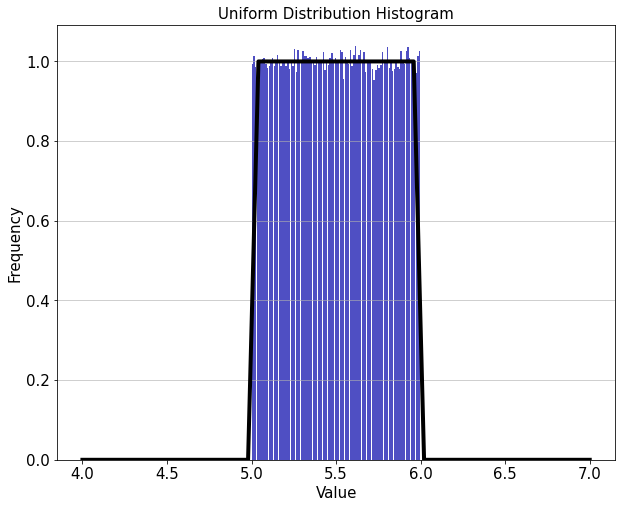

In [2]:
npoints = 320000
nbins = 100

shifted_uni = stats.uniform(loc=5)
np_hist = shifted_uni.rvs(size=npoints)

plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=np_hist, bins=nbins, color='#0504aa',alpha=0.7, rwidth=0.85, density=True)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Uniform Distribution Histogram',fontsize=15)

x = np.linspace(4,7)
h = plt.plot(x, shifted_uni.pdf(x), 'k-', lw=4)

plt.show()

**Задача**: попробуйте посемплировать из других распределений

In [3]:
def plot_distribution(distribution, name, plot_pdf=True, npoints=100, nbins=10, log=False):
  sample = distribution.rvs(size=npoints)

  plt.figure(figsize=[10,8])
  n, bins, patches = plt.hist(x=sample, bins=nbins, color='#0504aa', alpha=0.7, rwidth=0.85, density=True, log=log)

  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Value', fontsize=15)
  plt.ylabel('Density', fontsize=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.ylabel('Frequency', fontsize=15)
  plt.title('%s Distribution Histogram' % name.capitalize(), fontsize=15)

  if plot_pdf:
    x = np.linspace(sample.min(), sample.max(), 100)
    h = plt.plot(x, distribution.pdf(x), 'k-', lw=4)

  plt.show()

### Нормальное  распределение
$$f(x \mid \mu, \sigma) =\frac{1}{\sigma\sqrt{2\pi}} \exp \left [{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}\right]$$

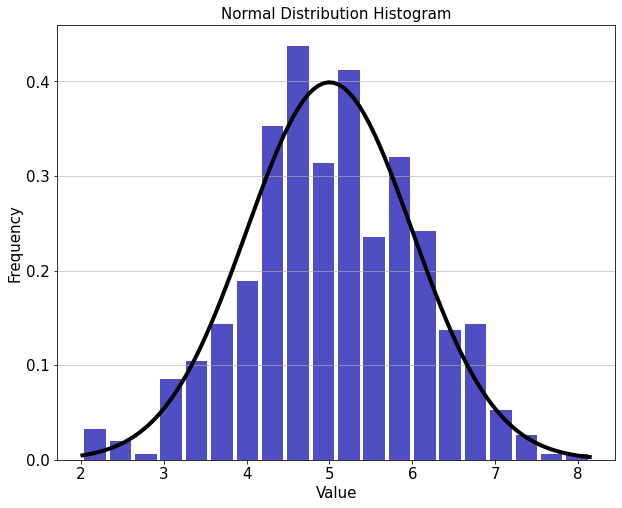

In [4]:
plot_distribution(
    distribution=stats.norm(loc=5),
    name='normal', 
    npoints=500, 
    nbins=20
)

### Равномерное распределение

$$  f(x \mid a, b)=\begin{cases}
  \frac{1}{b - a} & \mathrm{for}\ a \le x \le b, \\[8pt]
  0 & \mathrm{for}\ x<a\ \mathrm{or}\ x>b
  \end{cases}$$

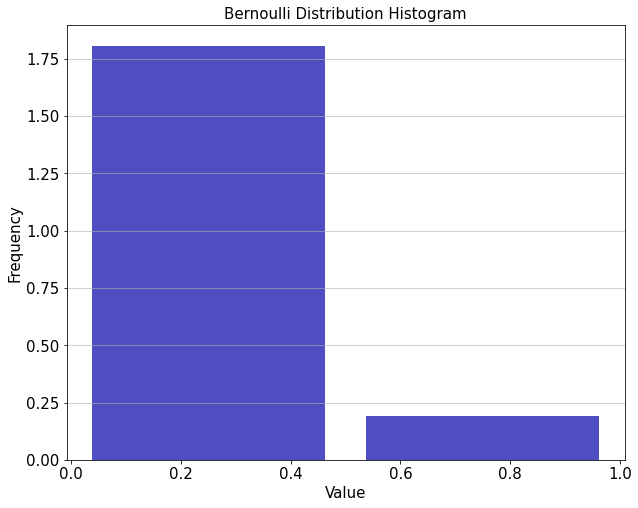

In [5]:
plot_distribution(
    distribution=stats.bernoulli(p=0.1), 
    name='bernoulli', 
    npoints=1000, 
    nbins=2, 
    plot_pdf=False
)

### Биномиальное расспределение
Вероятность того, что когда ты кидаешь нечестную монетку $n$ раз, у тебя орёл выпадет $k$ раз. Вероятность выпадения орла $\frac{1}{n}$
$$f(k \mid n,p) = \binom{n}{k}p^k(1-p)^{n-k}$$

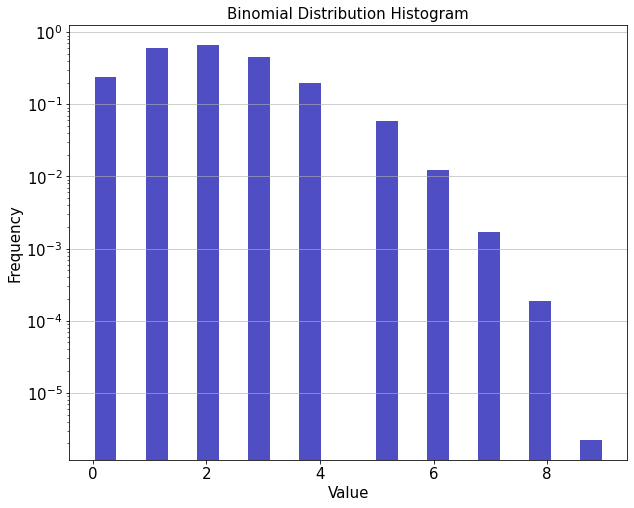

In [6]:
plot_distribution(
    distribution=stats.binom(n=10, p=0.2), 
    name='binomial', 
    npoints=1000000, 
    nbins=20, 
    plot_pdf=False, 
    log=True
)

### [Математическое ожидание](http://www.machinelearning.ru/wiki/index.php?title=Математическое_ожидание)
**Просто**: мера среднего значения случайной величины в теории вероятностей. 
Для дискретного случая:
 $$\mathbb{E}[X] = \sum_{i=1}^{+\infty} x_i p_i(x)$$
**Сложно**:
$$\mathbb{E}[X] = \int_{\Omega}\omega P(d\omega)$$ (определение через интеграл Лебега)
### [Диспеpсия случайной величины](https://ru.wikipedia.org/wiki/Дисперсия_случайной_величины)
Просто: мера разброса значений случайной величины относительно её математического ожидания. 
$$D[X] = \mathbb{E}[X - \mathbb{E}[X]]^2$$


**Оффтоп**: Из неравенства Чебышёва следует, что вероятность того, что значения случайной величины отстоят от математического ожидания этой случайной величины более чем на $k$ стандартных отклонений, составляет менее $1/k^{2}$. В специальных случаях оценка может быть усилена. Так, например, как минимум в 95 % случаев значения случайной величины, имеющей нормальное распределение, удалены от её среднего не более чем на два стандартных отклонения, а в примерно 99,7 % — не более чем на три.

# Зачем нужна статистика?

Реальность: нет заданного заранее распределения, есть данные.

Пример: "Котики бывают разные. Есть большие котики, а есть маленькие. Есть котики с длинными
хвостами, а есть и вовсе без хвостов. Есть котики с висячими ушками, а есть котики с короткими
лапками. Как же нам понять, как выглядит типичный котик?"


In [7]:
! wget https://scipy-lectures.org/_downloads/brain_size.csv

--2020-11-16 20:53:00--  https://scipy-lectures.org/_downloads/brain_size.csv
Resolving scipy-lectures.org (scipy-lectures.org)... 185.199.111.153, 185.199.110.153, 185.199.108.153, ...
Connecting to scipy-lectures.org (scipy-lectures.org)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1801 (1.8K) [text/csv]
Saving to: ‘brain_size.csv’

brain_size.csv      100%[===================>]   1.76K  --.-KB/s    in 0s      

2020-11-16 20:53:00 (36.2 MB/s) - ‘brain_size.csv’ saved [1801/1801]



In [8]:
! head -10 brain_size.csv

"";"Gender";"FSIQ";"VIQ";"PIQ";"Weight";"Height";"MRI_Count"
"1";"Female";133;132;124;"118";"64.5";816932
"2";"Male";140;150;124;".";"72.5";1001121
"3";"Male";139;123;150;"143";"73.3";1038437
"4";"Male";133;129;128;"172";"68.8";965353
"5";"Female";137;132;134;"147";"65.0";951545
"6";"Female";99;90;110;"146";"69.0";928799
"7";"Female";138;136;131;"138";"64.5";991305
"8";"Female";92;90;98;"175";"66.0";854258
"9";"Male";89;93;84;"134";"66.3";904858


 **Задача**: считайте датасет в табличку средствами pandas

In [9]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [10]:
data.size

320

 **Задача**: нарисуйте распределение веса для всей выборки, а таккже для мужчин и женщин , посчитайте такие статистики, как:
 - среднее
 - медиану
 - разброс

In [22]:
# your code here 

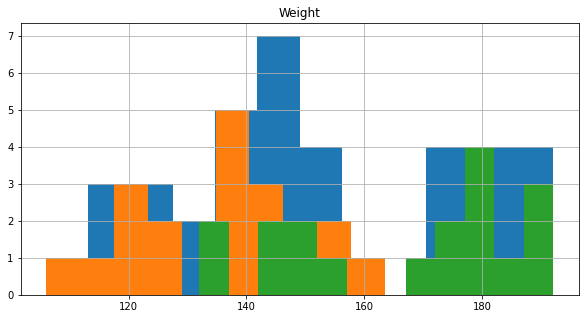

In [23]:
bins = 12
fig, ax = plt.subplots(figsize=(10, 5))
data.hist(column='Weight', bins=bins, ax=ax)
groupby_gender = data.groupby('Gender')
groupby_gender.hist(column='Weight', bins=bins, ax=ax)
plt.show()

In [12]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [13]:
groupby_gender.var()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,128.976316,561.042105,469.628947,481.628947,287.431579,5.236079,3.124090e+09
Male,150.028947,624.315789,657.460526,554.147368,401.908497,10.778947,3.126080e+09


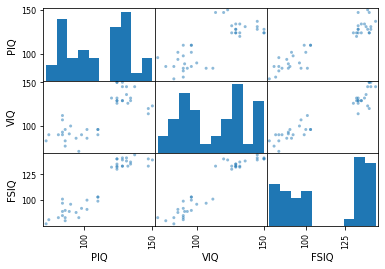

In [27]:
from pandas import plotting

plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])   
plt.show()

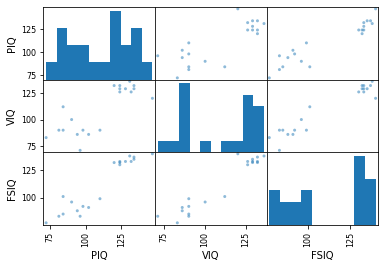

In [30]:
plotting.scatter_matrix(data[data.Gender == 'Female'][['PIQ', 'VIQ', 'FSIQ']])   
plt.show()

Библиотеки pandas + pyplot предоставляет возможность простой генерации довольно сложных и нужных на практике визуализаций. Более гибким языком для этих целей является R, этот язык пользуется большой популярностью в профессиональной среде аналитиков данных для работы с небольшими (менее 10 млн точек) или предагрегированными данными.

**Задача**: сгенерируйте выборки из нормального распределения размером $N$, где $N \in [1, 1000]$,  нарисуйте график среднего в зависимости от размера выборки. Попробуйте нарисовать для различнных значений $\sigma$


[**Закон больших чисел**](http://www.machinelearning.ru/wiki/index.php?title=Закон_больших_чисел) в теории вероятностей утверждает, что эмпирическое среднее (среднее арифметическое) конечной выборки из фиксированного распределения близко к теоретическому среднему (математическому ожиданию) этого распределения.

 


In [31]:
def test_LLN(dist, mincount=1, maxcount=2000, step=1):
  means = []
  counts = list(range(mincount, maxcount, step))
  for i in counts:
    means += [np.mean(dist.rvs(size=i))]

  plt.figure(figsize=[10,8])
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Step',fontsize=15)
  plt.ylabel('Mean value',fontsize=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.plot(counts, means, 'k-', lw=1)
  plt.title('Mean value converges',fontsize=15)

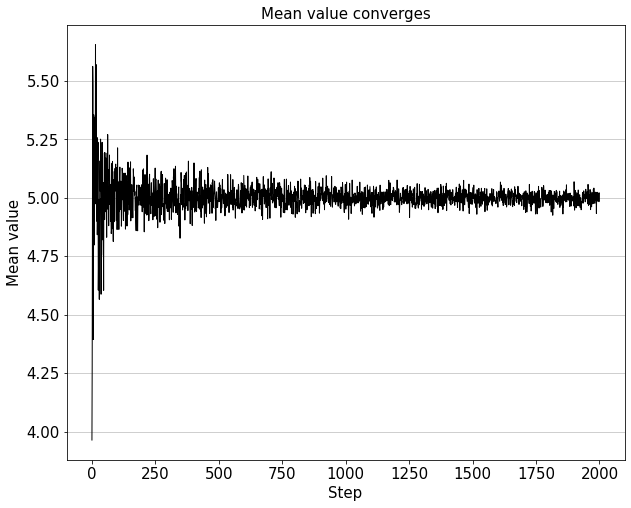

In [32]:
gdist = stats.norm(5)
test_LLN(gdist)

## Почему мы об этом говорим?

В машинном обучении мы пытаемся оценить значения параметров из неполных данных, порождённых с шумом, ошибками. Когда мы оцениваем уверенность в сделанных нами оценках, мы неявным образом применяем теорию вероятностей. Матаппарат, который мы начали рассматривать сегодня, необходим для того, чтобы работать с моделями машинного обучения не вслепую и понимать, что собой представляет результат применения наших моделей. 